<a href="https://colab.research.google.com/github/animeshdhakal/PyTorchBasics/blob/main/PyTorch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression with PyTorch

In [ ]:
import torch
from torch import nn
from matplotlib import pyplot as plt

In [ ]:
real_w = 3
X_train = torch.tensor([6.0, 3.0, 2.0, 5.0, 4.0])
Y_train = X_train * real_w
X_test = torch.tensor([2.0, 0.0, 7.0, 6.0, 8.0])
Y_test = X_test * real_w

X_train = X_train.unsqueeze(1)
Y_train = Y_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)
Y_test = Y_test.unsqueeze(1)

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, in_features, out_features):
    super(LinearRegression, self).__init__()
    self.l1 = nn.Linear(in_features, out_features)
  
  def forward(self, x):
    return self.l1(x)

In [ ]:
n_samples, n_features = X_train.shape

In [ ]:
model = LinearRegression(n_features, n_features)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
epochs = 1000

In [ ]:
for epoch in range(epochs):
  # Set the model to training mode
  model.train()
  
  # Forward Pass
  Y_pred = model(X_train)

  # Calculate Loss
  loss = loss_fn(Y_train, Y_pred)

  # Clear the gradient
  optimizer.zero_grad()

  # Back Propagation
  loss.backward()

  # Update the Weights
  optimizer.step()

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} Loss: {loss}")

Epoch: 0 Loss: 2.040755617827017e-07
Epoch: 100 Loss: 1.3343110083496867e-07
Epoch: 200 Loss: 8.740194346046337e-08
Epoch: 300 Loss: 5.7159923017024994e-08
Epoch: 400 Loss: 3.7582548628734e-08
Epoch: 500 Loss: 2.4625478545203805e-08
Epoch: 600 Loss: 1.600078647356895e-08
Epoch: 700 Loss: 1.0439362263525709e-08
Epoch: 800 Loss: 6.832124199718237e-09
Epoch: 900 Loss: 4.511457429856591e-09


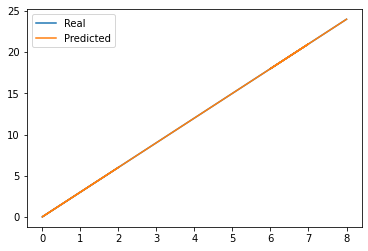

In [ ]:

model.eval()

with torch.inference_mode():
  Y_pred = model(X_test)

plt.plot(X_test, Y_test, label="Real")
plt.plot(X_test, Y_pred, label="Predicted")
plt.legend()


In [ ]:
model.state_dict()

OrderedDict([('l1.weight', tensor([[3.0000]])), ('l1.bias', tensor([0.0002]))])